# Electric Load Forecasting
## 1. Data Loading 
### 1.1 Climate Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
Years = '2018'

In [3]:
filepath = 'LoadForecasting/PopWeightTemp_AT00.xlsx'

# Load file with `sheet_name=None` - returns a dictionary
df_temp = pd.read_excel(
    filepath, 
    sheet_name=None,
    skiprows = 4, 
    usecols = [0,4],
    parse_dates=[0],
    index_col=[0]
)

# Combine data from all worksheets as single DataFrame
Temp = pd.concat(df_temp.values(), ignore_index=False)
Temp = Temp.rename(columns={'Unnamed: 4': 'Temperature'})  

# Filter only selected years

Temp = Temp.filter(regex=Years, axis=0)
Temp

,Temperature
Date,
2018-01-01 00:00:00,1.20
2018-01-01 01:00:00,1.10
2018-01-01 02:00:00,1.01
2018-01-01 03:00:00,0.91
2018-01-01 04:00:00,0.90
...,...
2018-12-31 19:00:00,1.57
2018-12-31 20:00:00,1.35
2018-12-31 21:00:00,1.26


In [4]:
filepath = 'LoadForecasting/Irradiance_AT00.xlsx'
    
# Load file with `sheet_name=None` - returns a dictionary
df_irr = pd.read_excel(
    filepath, 
    sheet_name=None,
    skiprows = 4, 
    usecols = [0,4],
    parse_dates=[0],
    index_col=[0]
)

# Combine data from all worksheets as single DataFrame
Irr = pd.concat(df_irr.values(), ignore_index=False)
Irr = Irr.rename(columns={'Unnamed: 4': 'Irradiance'})  

# Filter only selected years

Irr = Irr.filter(regex=Years, axis=0)
Irr

,Irradiance
Date,
2018-01-01 00:00:00,0.0
2018-01-01 01:00:00,0.0
2018-01-01 02:00:00,0.0
2018-01-01 03:00:00,0.0
2018-01-01 04:00:00,0.0
...,...
2018-12-31 19:00:00,0.0
2018-12-31 20:00:00,0.0
2018-12-31 21:00:00,0.0


In [5]:
filepath = 'LoadForecasting/windSpeed_AT00.xlsx' 

# Load file with `sheet_name=None` - returns a dictionary
df_wspeed = pd.read_excel(
    filepath, 
    sheet_name=None,
    skiprows = 4, 
    usecols = [0,4],
    parse_dates=[0],
    index_col=[0]
)

# Combine data from all worksheets as single DataFrame
Wspeed = pd.concat(df_wspeed.values(), ignore_index=False)
Wspeed = Wspeed.rename(columns={'Unnamed: 4': 'Wind Speed'})  

# Filter only selected years

Wspeed = Wspeed.filter(regex=Years, axis=0)
Wspeed

,Wind Speed
Date,
2018-01-01 00:00:00,3.43
2018-01-01 01:00:00,3.46
2018-01-01 02:00:00,3.46
2018-01-01 03:00:00,3.45
2018-01-01 04:00:00,3.48
...,...
2018-12-31 19:00:00,3.82
2018-12-31 20:00:00,3.64
2018-12-31 21:00:00,3.45


In [6]:
filepath = 'LoadForecasting/Load_AT00.xlsx'

# Load file with `sheet_name=None` - returns a dictionary
df_load = pd.read_excel(
    filepath, 
    sheet_name=None,
    skiprows = 4, 
    usecols = [0,4],
    parse_dates=[0],
    index_col=[0]
)

# Combine data from all worksheets as single DataFrame
Load = pd.concat(df_load.values(), ignore_index=False)
Load = Load.rename(columns={'Unnamed: 4': 'Load'})  

# Filter only years 2012 to 2018

Load = Load.filter(regex=Years, axis=0)
Load

,Load
Date,
2018-01-01 00:00:00,6569
2018-01-01 01:00:00,6329
2018-01-01 02:00:00,6112
2018-01-01 03:00:00,5805
2018-01-01 04:00:00,5717
...,...
2018-12-31 19:00:00,7948
2018-12-31 20:00:00,7497
2018-12-31 21:00:00,7119


,Temperature,Irradiance,Wind Speed,Load
Temperature,1.000000,0.540832,-0.225610,-0.264096
Irradiance,0.540832,1.000000,-0.113059,0.229300
Wind Speed,-0.225610,-0.113059,1.000000,0.115391
Load,-0.264096,0.229300,0.115391,1.000000


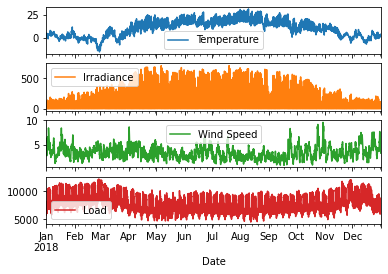

In [7]:
Climate = pd.concat([Temp, Irr, Wspeed, Load], axis=1)
Climate.plot(subplots=True)
Climate.corr()

### 1.2 Dayspecific Data
### Load already prepared Excel file which contains of information if a given day of the year is some sort of holiday or not. In order to account for different kind of holidays, four different holiday categories have been applied.

In [8]:
filepath = 'LoadForecasting/Holidays_AT00.xlsx'

# Load file with `sheet_name=None` - returns a dictionary
df_holidays = pd.read_excel(
    filepath, 
    sheet_name=None,
    skiprows = 4, 
    usecols = [0,3,4,5,6],
    parse_dates=[0],
    index_col=[0]
)

# Combine data from all worksheets as single DataFrame
Holidays = pd.concat(df_holidays.values(), ignore_index=False)

# Filter only selected years

Holidays = Holidays.filter(regex=Years, axis=0)
Holidays

,A,B,C,D
Date,,,,
2018-01-01,1,0,0,0
2018-01-02,0,1,0,0
2018-01-03,0,1,0,0
2018-01-04,0,1,0,0
2018-01-05,0,1,0,0
...,...,...,...,...
2018-12-27,0,1,0,0
2018-12-28,0,1,0,0
2018-12-29,0,0,0,0


### Since information if a given day is a Saturday or Sunday is not provided in the holiday Excel file, two additional columns indicating that are generated in the code below. 

In [9]:
#Insert column indicating if day is a saturday
Holidays['Sat'] = Holidays.index.weekday
Holidays.loc[Holidays['Sat'] != 5,'Sat'] = 0
Holidays.loc[Holidays['Sat'] == 5,'Sat'] = 1

#Insert column indicating if day is a sunday
Holidays['Sun'] = Holidays.index.weekday
Holidays.loc[Holidays['Sun'] != 6,'Sun'] = 0
Holidays.loc[Holidays['Sun'] == 6,'Sun'] = 1

Holidays

,A,B,C,D,Sat,Sun
Date,,,,,,
2018-01-01,1,0,0,0,0,0
2018-01-02,0,1,0,0,0,0
2018-01-03,0,1,0,0,0,0
2018-01-04,0,1,0,0,0,0
2018-01-05,0,1,0,0,0,0
...,...,...,...,...,...,...
2018-12-27,0,1,0,0,0,0
2018-12-28,0,1,0,0,0,0
2018-12-29,0,0,0,0,1,0


### Next, to concatenate the climate data with holiday data, resampling is applied to the latter in order to obtain fitting dimensions.

In [10]:
Holidays_resampled = Holidays.resample("1H").ffill()
Holidays_resampled

,A,B,C,D,Sat,Sun
Date,,,,,,
2018-01-01 00:00:00,1,0,0,0,0,0
2018-01-01 01:00:00,1,0,0,0,0,0
2018-01-01 02:00:00,1,0,0,0,0,0
2018-01-01 03:00:00,1,0,0,0,0,0
2018-01-01 04:00:00,1,0,0,0,0,0
...,...,...,...,...,...,...
2018-12-30 20:00:00,0,0,0,0,0,1
2018-12-30 21:00:00,0,0,0,0,0,1
2018-12-30 22:00:00,0,0,0,0,0,1


In [11]:
Master = pd.concat([Temp, Irr, Wspeed, Holidays_resampled, Load], axis=1)
Master

,Temperature,Irradiance,Wind Speed,A,B,C,D,Sat,Sun,Load
Date,,,,,,,,,,
2018-01-01 00:00:00,1.20,0.0,3.43,1.0,0.0,0.0,0.0,0.0,0.0,6569
2018-01-01 01:00:00,1.10,0.0,3.46,1.0,0.0,0.0,0.0,0.0,0.0,6329
2018-01-01 02:00:00,1.01,0.0,3.46,1.0,0.0,0.0,0.0,0.0,0.0,6112
2018-01-01 03:00:00,0.91,0.0,3.45,1.0,0.0,0.0,0.0,0.0,0.0,5805
2018-01-01 04:00:00,0.90,0.0,3.48,1.0,0.0,0.0,0.0,0.0,0.0,5717
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,1.57,0.0,3.82,NaN,NaN,NaN,NaN,NaN,NaN,7948
2018-12-31 20:00:00,1.35,0.0,3.64,NaN,NaN,NaN,NaN,NaN,NaN,7497
2018-12-31 21:00:00,1.26,0.0,3.45,NaN,NaN,NaN,NaN,NaN,NaN,7119


### To account for NaN values in calendar data: exclude these rows for the proceeding steps.

In [12]:
#Master.drop(Master.index[8736:8760], inplace=True)
Master = Master[~np.isnan(Master).any(axis=1)]

In [13]:
Master.info()

#from IPython.display import display, HTML

#display(HTML(Master.to_html()))


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8737 entries, 2018-01-01 00:00:00 to 2018-12-31 00:00:00
Freq: H
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  8737 non-null   float64
 1   Irradiance   8737 non-null   float64
 2   Wind Speed   8737 non-null   float64
 3   A            8737 non-null   float64
 4   B            8737 non-null   float64
 5   C            8737 non-null   float64
 6   D            8737 non-null   float64
 7   Sat          8737 non-null   float64
 8   Sun          8737 non-null   float64
 9   Load         8737 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 750.8 KB


# 2. Preprocessing

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

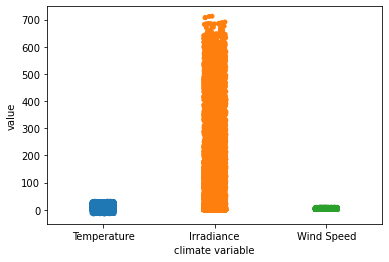

In [15]:
df_noload = Climate.drop("Load", axis=1)

df_stripplot = pd.melt(df_noload, value_name="value", var_name="climate variable")

ax = sns.stripplot(data=df_stripplot, y="value", x="climate variable")
_ = ax.set_xticklabels(ax.get_xticklabels())

In [16]:
scaler = StandardScaler(with_mean=True, with_std=True)
df_scaled = pd.DataFrame(scaler.fit_transform(df_noload), columns=df_noload.columns)
df_scaled.head()

,Temperature,Irradiance,Wind Speed
0,-0.991454,-0.682633,0.050078
1,-1.002728,-0.682633,0.073684
2,-1.012875,-0.682633,0.073684
3,-1.024150,-0.682633,0.065815
4,-1.025278,-0.682633,0.089421


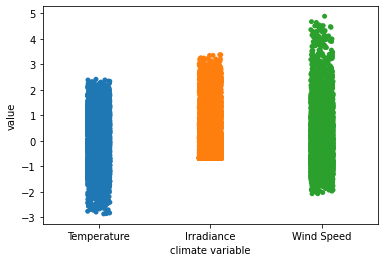

In [17]:
df_stripplot = pd.melt(df_scaled, value_name="value", var_name="climate variable")

ax = sns.stripplot(data=df_stripplot, y="value", x="climate variable")
_ = ax.set_xticklabels(ax.get_xticklabels())

In [18]:
#merge new master table with rescaled climate variables

Master_new = pd.concat([df_scaled,Holidays_resampled.reset_index(),Load.reset_index().drop('Date', axis=1)], axis=1)
#Master_new.drop(Master_new.index[8736:8760], inplace=True)
Master_new = Master_new[~np.isnan(Master_new).any(axis=1)]
Master_new = Master_new.set_index('Date')
Master_new

,Temperature,Irradiance,Wind Speed,A,B,C,D,Sat,Sun,Load
Date,,,,,,,,,,
2018-01-01 00:00:00,-0.991454,-0.682633,0.050078,1.0,0.0,0.0,0.0,0.0,0.0,6569
2018-01-01 01:00:00,-1.002728,-0.682633,0.073684,1.0,0.0,0.0,0.0,0.0,0.0,6329
2018-01-01 02:00:00,-1.012875,-0.682633,0.073684,1.0,0.0,0.0,0.0,0.0,0.0,6112
2018-01-01 03:00:00,-1.024150,-0.682633,0.065815,1.0,0.0,0.0,0.0,0.0,0.0,5805
2018-01-01 04:00:00,-1.025278,-0.682633,0.089421,1.0,0.0,0.0,0.0,0.0,0.0,5717
...,...,...,...,...,...,...,...,...,...,...
2018-12-30 20:00:00,-0.811058,-0.682633,3.158145,0.0,0.0,0.0,0.0,0.0,1.0,7749
2018-12-30 21:00:00,-0.814441,-0.682633,3.040117,0.0,0.0,0.0,0.0,0.0,1.0,7584
2018-12-30 22:00:00,-0.823461,-0.682633,2.363424,0.0,0.0,0.0,0.0,0.0,1.0,7577


# 3. Model Training and Evaluation

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

from scipy.stats import loguniform

import matplotlib.pyplot as plt

In [20]:
X = Master_new.drop("Load", axis=1)
y = Master_new["Load"]

## 3.1 Linear Regression

In [28]:
lr = LinearRegression()

In [29]:
kf = KFold(n_splits=5, shuffle=True)
pred = cross_val_predict(lr, X, y, cv=kf)

In [30]:
MAPE = mean_absolute_percentage_error(y, pred)
R2 = r2_score(y,pred)
CVS = cross_val_score(lr, X, y, cv=kf).mean()

pd.DataFrame([MAPE, R2, CVS], index=["MAPE","R2","CVS"]).transpose()

,MAPE,R2,CVS
0,0.123924,0.47682,0.476684


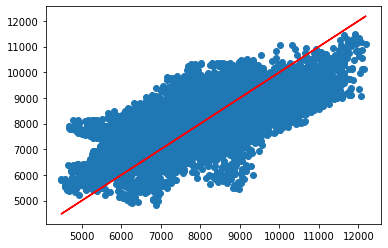

In [31]:
plt.scatter(y, pred)
plt.plot(y, y, c="r")

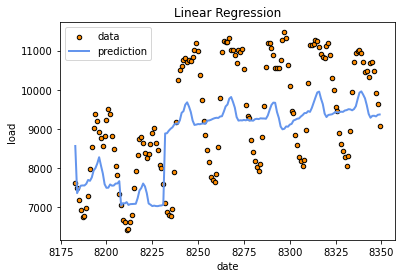

In [32]:
week = 50

Time = X.reset_index()
Time = Time.loc[:,"Date"]
Time = Time.index[(week-1)*167:week*167]

y_w = y.reset_index()
y_w = y_w.loc[:,"Load"]
y_w = y_w[(week-1)*167:week*167]

pred_w = pred[(week-1)*167:week*167]

plt.figure()
plt.scatter(Time, y_w, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(Time, pred_w, color="cornflowerblue", label="prediction", linewidth=2)
plt.xlabel("date")
plt.ylabel("load")
plt.title("Linear Regression")
plt.legend()
plt.show()

## 3.2 Gradient Boosting Regression

In [33]:
gb = GradientBoostingRegressor()

In [34]:
pred = cross_val_predict(gb, X, y, cv=kf)

In [35]:
MAPE = mean_absolute_percentage_error(y, pred)
R2 = r2_score(y,pred)
CVS = cross_val_score(gb, X, y, cv=kf).mean()

pd.DataFrame([MAPE, R2, CVS], index=["MAPE","R2","CVS"]).transpose()

,MAPE,R2,CVS
0,0.0868,0.701695,0.701506


### Hyper-parameter tuning

In [36]:
param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": loguniform(0.01, 1),
}
search_cv = RandomizedSearchCV(
    GradientBoostingRegressor(), param_distributions=param_distributions,
    scoring="neg_mean_absolute_percentage_error", n_iter=54, cv=kf, random_state=0, n_jobs=2
)
search_cv.fit(X, y)

columns = [f"param_{name}" for name in param_distributions.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error").head(10)

,param_n_estimators,param_max_leaf_nodes,param_learning_rate,mean_test_error,std_test_error
1,200,20,0.160519,0.084906,0.000684
10,200,20,0.109889,0.085185,0.000742
12,200,50,0.110585,0.085227,0.000574
32,200,20,0.076458,0.085730,0.000683
46,100,100,0.492966,0.086528,0.001314
25,50,100,0.176612,0.087388,0.000640
52,200,100,0.0401,0.087941,0.000628
26,50,5,0.205428,0.088202,0.000360
37,500,20,0.014663,0.088505,0.000637
51,100,50,0.061622,0.089422,0.000715


In [37]:
gb = GradientBoostingRegressor(learning_rate=0.160519, n_estimators=200, max_leaf_nodes=20)

In [38]:
pred = cross_val_predict(gb, X, y, cv=kf)

In [39]:
MAPE = mean_absolute_percentage_error(y, pred)
R2 = r2_score(y,pred)
CVS = cross_val_score(gb, X, y, cv=kf).mean()

pd.DataFrame([MAPE, R2, CVS], index=["MAPE","R2","CVS"]).transpose()

,MAPE,R2,CVS
0,0.085275,0.70703,0.706924


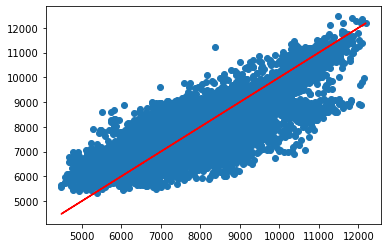

In [40]:
plt.scatter(y, pred)
plt.plot(y, y, c="r")

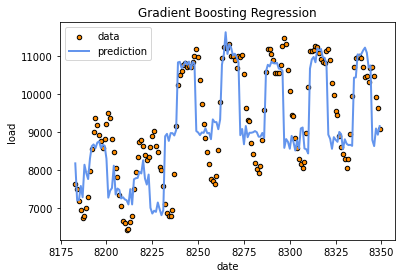

In [41]:
week = 50

Time = X.reset_index()
Time = Time.loc[:,"Date"]
Time = Time.index[(week-1)*167:week*167]

y_w = y.reset_index()
y_w = y_w.loc[:,"Load"]
y_w = y_w[(week-1)*167:week*167]

pred_w = pred[(week-1)*167:week*167]

plt.figure()
plt.scatter(Time, y_w, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(Time, pred_w, color="cornflowerblue", label="prediction", linewidth=2)
plt.xlabel("date")
plt.ylabel("load")
plt.title("Gradient Boosting Regression")
plt.legend()
plt.show()

## 3.3 Random Forest Regression

In [42]:
rf = RandomForestRegressor()

In [43]:
pred = cross_val_predict(rf, X, y, cv=kf)

In [44]:
MAPE = mean_absolute_percentage_error(y, pred)
R2 = r2_score(y,pred)
CVS = cross_val_score(rf, X, y, cv=kf).mean()

pd.DataFrame([MAPE, R2, CVS], index=["MAPE","R2","CVS"]).transpose()

,MAPE,R2,CVS
0,0.078247,0.72799,0.723876


### Hyper-parameter tuning

In [45]:
param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000],
}
search_cv = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=2), param_distributions=param_distributions,
    scoring="neg_mean_absolute_percentage_error", n_iter=120, cv=kf, random_state=0, n_jobs=2,
)
search_cv.fit(X, y)

columns = [f"param_{name}" for name in param_distributions.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error").head(10)

,param_n_estimators,param_max_leaf_nodes,mean_test_error,std_test_error
117,200,10000,0.078935,0.001389
109,1000,5000,0.078974,0.001503
119,1000,10000,0.078981,0.001461
108,500,5000,0.079000,0.001431
107,200,5000,0.079040,0.001320
116,100,10000,0.079040,0.001244
118,500,10000,0.079073,0.001596
98,500,2000,0.079106,0.001502
96,100,2000,0.079106,0.001386
99,1000,2000,0.079164,0.001503


In [46]:
rf = RandomForestRegressor(n_estimators=200, max_leaf_nodes=10000)

In [47]:
pred = cross_val_predict(rf, X, y, cv=kf)

In [48]:
MAPE = mean_absolute_percentage_error(y, pred)
R2 = r2_score(y,pred)
CVS = cross_val_score(rf, X, y, cv=kf).mean()

pd.DataFrame([MAPE, R2, CVS], index=["MAPE","R2","CVS"]).transpose()

,MAPE,R2,CVS
0,0.078507,0.72709,0.724596


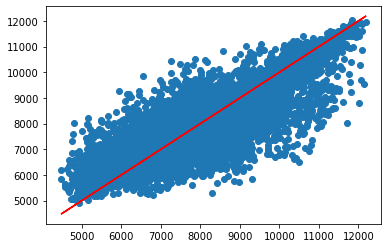

In [49]:
plt.scatter(y, pred)
plt.plot(y, y, c="r")

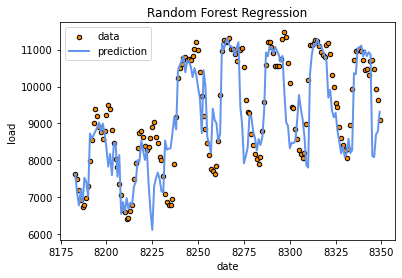

In [50]:
week = 50

Time = X.reset_index()
Time = Time.loc[:,"Date"]
Time = Time.index[(week-1)*167:week*167]

y_w = y.reset_index()
y_w = y_w.loc[:,"Load"]
y_w = y_w[(week-1)*167:week*167]

pred_w = pred[(week-1)*167:week*167]

plt.figure()
plt.scatter(Time, y_w, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(Time, pred_w, color="cornflowerblue", label="prediction", linewidth=2)
plt.xlabel("date")
plt.ylabel("load")
plt.title("Random Forest Regression")
plt.legend()
plt.show()